In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load training and testing datasets
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Display info about test data
print(" Test Data Info:")
print(test_data.info())

# Define features and target for training
X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# Define features and target for testing
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("\n Model Evaluation Metrics:")
print("R² Score: {:.4f}".format(r2_score(y_test, y_pred)))
print("Mean Squared Error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: {:.4f}".format(mean_absolute_error(y_test, y_pred)))


 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None

 Model Evaluation Metrics:
R² Score: 0.6195
Mean Squared Error: 4867205486.9288
Mean Absolute Error: 50352.2283


The dataset consists of 3,000 test samples with 9 numerical features, all of which are non-null and of type float64. The features represent geographic and demographic attributes such as longitude, latitude, housing age, total rooms, households, and median income, with the target variable being median_house_value.

A Linear Regression model was trained to predict house prices. The model achieved an R² score of 0.6195, indicating that approximately 62% of the variance in house prices is explained by the model. While the model shows moderate predictive power, there is still room for improvement. The Mean Squared Error (MSE) is quite high at 4.87 billion, and the Mean Absolute Error (MAE) is approximately 50,352, suggesting the average prediction error is about $50K.

These results suggest the model captures general trends but may benefit from enhancements such as feature engineering, regularization, or using more complex models like tree-based regressors.

In [21]:
pip install ucimlrepo

<ipython-input-30-1175575575>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")
<ipython-input-30-1175575575>:27: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


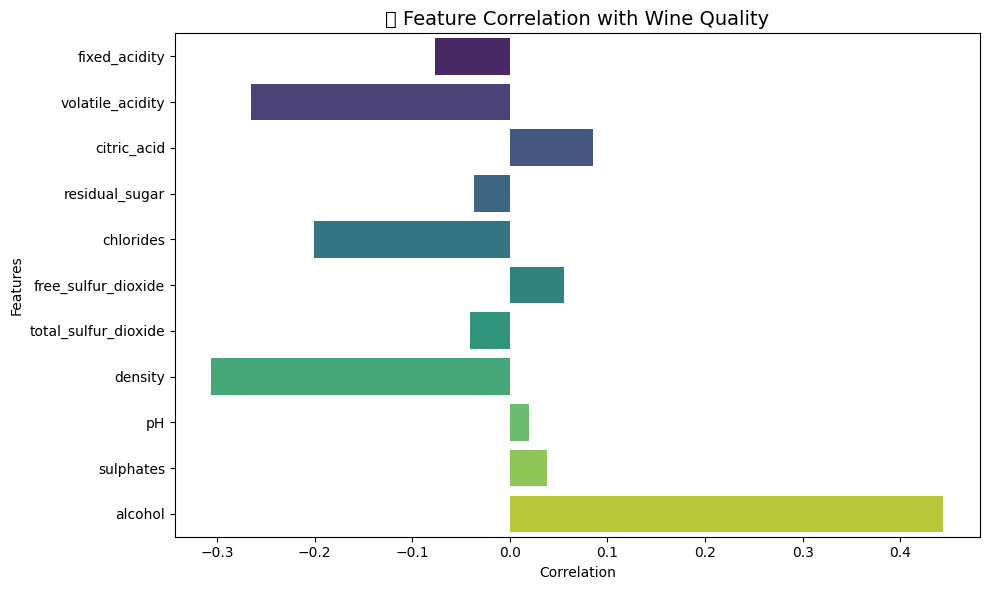


 Linear Regression Model Performance:
R² Score: 0.2598
Mean Squared Error: 0.5467
Mean Absolute Error: 0.5659


In [30]:
# 📦 Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Fetch the Wine Quality dataset from UCI Repository (ID: 186)
wine_quality = fetch_ucirepo(id=186)

# Extract features and target
X = wine_quality.data.features
y = wine_quality.data.targets

# Check feature correlation with target
corr = X.corrwith(y.squeeze())
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("🔗 Feature Correlation with Wine Quality", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#  Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print("\n Linear Regression Model Performance:")
print("R² Score: {:.4f}".format(r2_score(y_test, y_pred)))
print("Mean Squared Error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: {:.4f}".format(mean_absolute_error(y_test, y_pred)))


A Linear Regression model was trained to predict wine quality based on various physicochemical properties (e.g., acidity, sugar, pH, alcohol content). The model achieved an R² score of 0.2598, indicating that only 26% of the variance in wine quality is explained by the features used.

The Mean Squared Error (MSE) was 0.5467, and the Mean Absolute Error (MAE) was 0.5659, suggesting that the model’s predictions differ from the actual wine quality by approximately 0.57 units on average.

These results reflect the limitations of using a linear model for this task, likely due to the non-linear and subjective nature of wine quality ratings. Performance could be improved by exploring:

Non-linear models (e.g., Random Forest, Gradient Boosting),

Feature transformations (e.g., polynomial features), or

Treating the task as a classification problem instead of regression.
